In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math
import pickle
import time



##### set parent directory

In [2]:
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

# Move to the parent directory
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)

# Print the updated working directory
updated_directory = os.getcwd()
print("Updated Directory:", updated_directory)

Current Directory: /mnt/c/users/rjmay/code/research_ms/alt_distr
Updated Directory: /mnt/c/users/rjmay/code/research_ms


### Simulation stage

In [3]:
from modules.multi_bounds_v3 import bounds_class
from modules.Bhatt_knn_func import knn_num_calc
from modules.data_gen import data_gen

In [4]:
PICKLED =True

In [5]:
file_path = 'sim_data/normal_beta.pkl' # DONT FORGET TO CHANGE ME IF YOU COPY AND PASTE


# if PICKLED  == False:
    
#     objects_to_save = bound_obj_lst


#     with open(file_path, 'wb') as file:
#         # Use pickle.dump to serialize and write the list of objects to the file
#         pickle.dump(objects_to_save, file)
#     print(f'Objects saved to {file_path}')
    

if PICKLED == True:
    

    # Open the file in binary read mode
    with open(file_path, 'rb') as file:
        # Use pickle.load to deserialize and load the list of objects from the file
        loaded_objects = pickle.load(file)

    print('Loaded object successfully')
    
    bound_obj_lst = loaded_objects

Loaded object successfully


### Using the data

may or not be pickled. 

In [6]:
dp_l = []
dp_u = []

Bha_u =[]
Bha_l =[]

Bha_knn_u = []
Bha_knn_l = []

inf_l = []
inf_u = []

enDive_l = []
enDive_u = []


for obj in bound_obj_lst:
    a,b = obj.get_bounds_dp()
    dp_l.append(a)
    dp_u.append(b)
    
    a,b = obj.get_bounds_Bha()
    Bha_l.append(a)
    Bha_u.append(b)

    
#     a, b = obj.get_bounds_tight()
#     tight_l.append(a)
#     tight_u.append(b)
    
    a, b= obj.get_bounds_Bha_knn()
    Bha_knn_l.append(a)
    Bha_knn_u.append(b)
    
    a,b = obj.get_inf_bounds()
    inf_l.append(a)
    inf_u.append(b)
    
    a,b = obj.get_Bounds_enDive()
    enDive_l.append(a)
    enDive_u.append(b)
    
    

Calculate true values

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import beta
#### I have to code the true values and theoreticals. 

# Define dx and x range
dx = 0.001
x = np.arange(-10, 10 + dx, dx)

# Define the normal distributions
f0 = norm.pdf(x, loc=0, scale=1)
f1 = beta.pdf(x, a=20, b=20)

# Calculate the minimum of f0 and f1
min_f0_f1 = np.minimum(f0, f1)
# Calculate BER as 0.5 * sum(min(f0, f1) * dx)
BER = 0.5 * np.sum(min_f0_f1 * dx)

p = 0.5
q = 0.5
pf0 = p * f0
qf1 = q * f1

# Calculate the function
func = (pf0 - qf1)**2 / (pf0 + qf1)

# Calculate dp using numerical integration (sum and dx)
dp = np.sum(func) * dx

# Calculate upper and lower bounds
upper = 0.5 - 0.5 * dp
lower = 0.5 - 0.5 * np.sqrt(dp)

theory_Dp = [lower, upper]

func2 = np.sqrt(f0 * f1)
# Calculate BC using numerical integration (sum and dx)
BC = np.sum(func2) * dx

lower = 0.5 - 0.5 * np.sqrt(1 - BC**2)
upper = 0.5 * BC

theory_bha = [lower, upper]


In [8]:
BER

0.0726617598018901

True value is     0.07


In [9]:
### this cell helps to fix bugs from not doing the data in here. 
MC_num = len(bound_obj_lst[0])

BER_lst = np.ones(MC_num) * BER

sample_sizes = np.logspace(2, 3.3011, 9 , endpoint = True, dtype = int)


def mse(l1, l2):## numpy lists
    return ((l1 - l2)**2).mean(axis=0)

In [10]:
# cases = len(sample_sizes)

## theoretical MSE
bha_theoretical_l= np.ones(MC_num) * (theory_bha[0])
bha_theoretical_u= np.ones(MC_num) * (theory_bha[1])


dp_theoretical_l= np.ones(MC_num) * theory_Dp[0]
dp_theoretical_u= np.ones(MC_num) * theory_Dp[1]


In [11]:
lower_mse_DP = []
upper_mse_DP =[]

lower_mse_Bha = []
upper_mse_Bha =[]


lower_mse_Bha_knn = []
upper_mse_Bha_knn =[]

lower_mse_inf = []
upper_mse_inf = []

lower_mse_enDive = []
upper_mse_enDive = []

# lower_MSE_tight =[]
# upper_MSE_tight= []


for i in range(len(bound_obj_lst)):
    l_mse = mse(dp_theoretical_l, dp_l[i]) 
    lower_mse_DP.append(l_mse)
    
    u_mse = mse(dp_theoretical_u, dp_u[i]) 
    upper_mse_DP.append(u_mse)       
    
    l_mse = mse(dp_theoretical_l, enDive_l[i]) 
    lower_mse_enDive.append(l_mse)
    
    u_mse = mse(dp_theoretical_u, enDive_u[i]) 
    upper_mse_enDive.append(u_mse)

    
    l_mse = mse(bha_theoretical_l, Bha_l[i]) 
    lower_mse_Bha.append(l_mse)
    
    u_mse = mse(bha_theoretical_u, Bha_u[i])
    upper_mse_Bha.append(u_mse) 
    
    l_mse = mse(bha_theoretical_l, Bha_knn_l[i]) 
    lower_mse_Bha_knn.append(l_mse)
    
    u_mse = mse(bha_theoretical_u, Bha_knn_u[i])
    upper_mse_Bha_knn.append(u_mse) 
    
    l_mse = mse(bha_theoretical_l, inf_l[i]) 
    lower_mse_inf.append(l_mse)
    
    u_mse = mse(bha_theoretical_u, inf_u[i])
    upper_mse_inf.append(u_mse) 
    
#     l_mse =mse(BER_lst, tight_l[i])
#     lower_MSE_tight.append(l_mse)
    
#     u_mse =mse(BER_lst, tight_u[i])
#     lower_MSE_tight.append(u_mse)

### Plotting

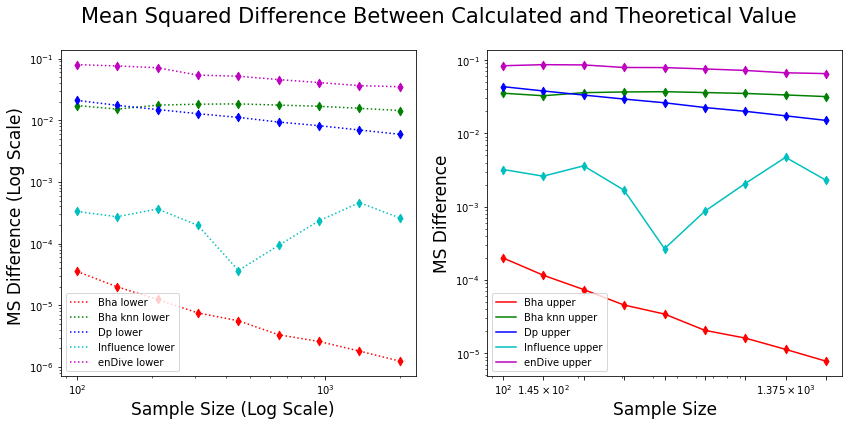

In [12]:
fs =17

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
st = fig.suptitle("Mean Squared Difference Between Calculated and Theoretical Value", fontsize=fs+4)
ax = axes[0]


ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)

ax.plot(sample_sizes, lower_mse_Bha,'r:', label='Bha lower')
ax.scatter(sample_sizes, lower_mse_Bha, color = 'red', marker = 'd')

ax.plot(sample_sizes, lower_mse_Bha_knn, color = 'g',linestyle=":",  label = "Bha knn lower")
ax.scatter(sample_sizes, lower_mse_Bha_knn, color = 'g', marker = 'd')


ax.plot(sample_sizes, lower_mse_DP,  'b:', label='Dp lower')
ax.scatter(sample_sizes, lower_mse_DP,  color='b', marker='d')

ax.plot(sample_sizes, lower_mse_inf,  'c:', label='Influence lower')
ax.scatter(sample_sizes, lower_mse_inf,  color='c', marker='d')

ax.plot(sample_sizes, lower_mse_enDive,  'm:', label='enDive lower')
ax.scatter(sample_sizes, lower_mse_enDive,  color='m', marker='d')

ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("MS Difference (Log Scale) ", fontsize=fs)
# ax.set_title("MSE Between  and Theoretical Value", fontsize = fs +4)



ax.legend()

ax = axes[1]

ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)

ax.plot(sample_sizes, upper_mse_Bha,'r-', label='Bha upper')
ax.scatter(sample_sizes, upper_mse_Bha, color = 'red', marker = 'd')


ax.plot(sample_sizes, upper_mse_Bha_knn, color = 'g',  label = "Bha knn upper")
ax.scatter(sample_sizes, upper_mse_Bha_knn, color = 'g', marker = 'd')


ax.plot(sample_sizes, upper_mse_DP,  'b-', label='Dp upper')
ax.scatter(sample_sizes, upper_mse_DP,  color='b', marker='d')

ax.plot(sample_sizes, upper_mse_inf,  'c-', label='Influence upper')
ax.scatter(sample_sizes, upper_mse_inf,  color='c', marker='d')

ax.plot(sample_sizes, upper_mse_enDive,  'm-', label='enDive upper')
ax.scatter(sample_sizes, upper_mse_enDive,  color='m', marker='d')

ax.set_xlabel("Sample Size", fontsize = fs)
ax.set_ylabel("MS Difference", fontsize=fs)
# ax.set_title("Mean Squared Difference Between and Theoretical Value", fontsize = fs +4)

ax.legend()

# plt.savefig("log_test.png",facecolor=(1,1,1,1))
ax.set_xticks(sample_sizes)
plt.show()


Bhattacharyya, Bha Knn, influence same theoretically

Dp, enDive

In [13]:
BER

0.0726617598018901

In [14]:
lst = [obj.validity(BER) for obj in bound_obj_lst ]

df_valid = pd.DataFrame(lst, index = sample_sizes)

df_valid


,Dp_lower,Dp_upper,Bha_lower,Bha_upper,Bha_knn_lower,Bha_knn_upper,tight_lower,tight_upper,Maha_upper,inf_lower,inf_upper,enDive_lower,enDive_upper
100,0.0,1.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,1.0,0.035,0.9900
145,0.0,1.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,1.0,0.005,0.9975
211,0.0,1.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,1.0,0.000,1.0000
307,0.0,1.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,1.0,0.000,1.0000
447,0.0,1.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,1.0,0.000,1.0000
650,0.0,1.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,1.0,0.000,1.0000
945,0.0,1.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,1.0,0.000,1.0000
1375,0.0,1.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,1.0,0.000,1.0000
2000,0.0,1.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,1.0,0.000,1.0000


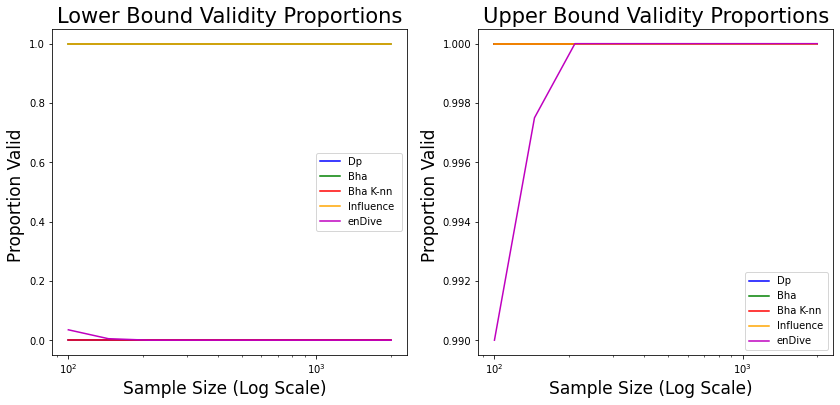

In [15]:
fs =17

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

ax = axes[0]

ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)

ax.plot(df_valid["Dp_lower"], 'b',  label='Dp  ')
# ax.plot(sample_sizes, validity_dp_u/ MC_num, 'r', label='Upper Dp Validity ')

ax.plot(df_valid["Bha_lower"],'g', label='Bha  ')
# ax.plot(sample_sizes, validity_Bha_u/ MC_num, 'orange', label='Upper Bha Validity ')

ax.plot(df_valid["Bha_knn_lower"],'r', label='Bha K-nn  ')
# ax.plot(sample_sizes, validity_Bha_u/ MC_num, 'orange', label='Upper Bha Validity ')

ax.plot(df_valid["inf_lower"],'orange', label='Influence')

ax.plot(df_valid["enDive_lower"],'m', label='enDive')


# ax.plot(df_valid["tight_lower"],'orange', label='Tight  ')


# ax.plot(sample_sizes, validity_tight_u/ MC_num,  label='Upper Tight Validity ')
# ax.set_xticks(sample_sizes)

ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("Proportion Valid ", fontsize=fs)
ax.set_title("Lower Bound Validity Proportions" , fontsize = fs +4)
ax.legend()


ax = axes[1]


ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)

ax.plot(df_valid["Dp_upper"], 'b',  label='Dp  ')

ax.plot(df_valid["Bha_upper"],'g', label='Bha  ')

ax.plot(df_valid["Bha_knn_upper"],'r', label='Bha K-nn ')

# ax.plot(df_valid["Maha_upper"],'black', label='Maha ')
ax.plot(df_valid["inf_upper"],'orange', label='Influence')

ax.plot(df_valid["enDive_upper"],'m', label='enDive')


# ax.plot(df_valid["tight_upper"],'orange', label='Tight  ')
# ax.set_xticks(sample_sizes)
ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("Proportion Valid ", fontsize=fs)
ax.set_title("Upper Bound Validity Proportions" , fontsize = fs +4)
ax.legend()

# plt.savefig("proportions_n.png",facecolor=(1,1,1,1))
plt.show()